In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


importing libraries and read the CSV files.

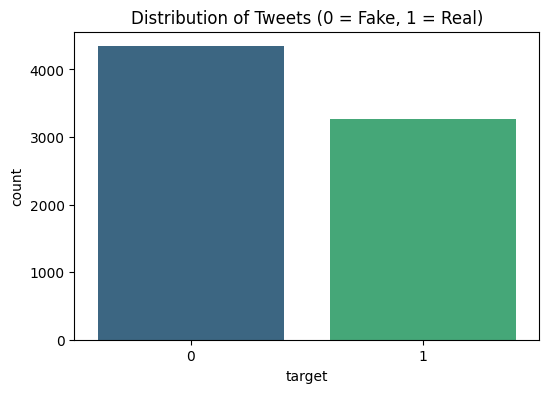

Total tweets with URLs: 3971 out of 7613


In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="target",
    hue="target",
    data=train_df,
    palette="viridis",
    legend=False
)
plt.title("Distribution of Tweets (0 = Fake, 1 = Real)")
plt.show()

has_url = train_df["text"].str.contains("http").sum()
print(f"Total tweets with URLs: {has_url} out of {len(train_df)}")


visualising the tweets - real vs fake

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"@\w+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.encode("ascii", "ignore").decode()
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_df["text_cleaned"] = train_df["text"].apply(clean_text)
test_df["text_cleaned"] = test_df["text"].apply(clean_text)

print("Original:", train_df["text"].iloc[31])
print("Cleaned: ", train_df["text_cleaned"].iloc[31])


Original: @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
Cleaned:  wholesale markets ablaze


text cleaning , uses regex to delete URLs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(
    train_df["text_cleaned"],
    train_df["target"],
    test_size=0.2,
    random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

preds = model.predict(X_val_vec)
print(f"F1-Score for the classic model: {f1_score(y_val, preds):.4f}")


Classic Model F1-Score: 0.7571


 vectorises the text using TF- IDF. IT uses a logistic regression model to recognize disaster patterns and calculates an F1-score.

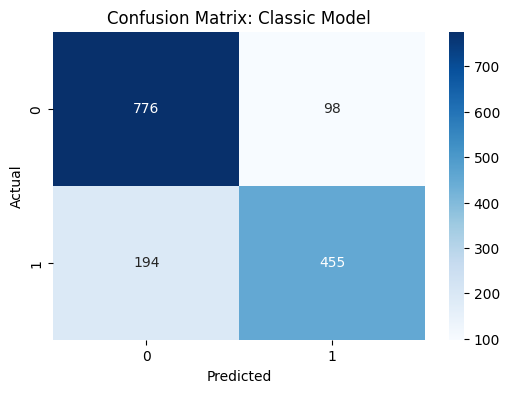

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, preds), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Classic Model")
plt.show()


In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=100,
    random_state=42,
    verbose=True
)

mlp.fit(X_train_vec, y_train)

mlp_preds = mlp.predict(X_val_vec)
print(f" F1-Score: {f1_score(y_val, mlp_preds):.4f}")


Iteration 1, loss = 0.66982738
Iteration 2, loss = 0.56745641
Iteration 3, loss = 0.41804700
Iteration 4, loss = 0.31171655
Iteration 5, loss = 0.24922335
Iteration 6, loss = 0.20538358
Iteration 7, loss = 0.17326830
Iteration 8, loss = 0.14670056
Iteration 9, loss = 0.12617824
Iteration 10, loss = 0.10918010
Iteration 11, loss = 0.09616998
Iteration 12, loss = 0.08517265
Iteration 13, loss = 0.07606882
Iteration 14, loss = 0.07098114
Iteration 15, loss = 0.06639937
Iteration 16, loss = 0.06059318
Iteration 17, loss = 0.05865522
Iteration 18, loss = 0.05661856
Iteration 19, loss = 0.05472515
Iteration 20, loss = 0.05259053
Iteration 21, loss = 0.05027879
Iteration 22, loss = 0.04885246
Iteration 23, loss = 0.04849138
Iteration 24, loss = 0.04760066
Iteration 25, loss = 0.04584985
Iteration 26, loss = 0.04595813
Iteration 27, loss = 0.04509633
Iteration 28, loss = 0.04364077
Iteration 29, loss = 0.04400075
Iteration 30, loss = 0.04359147
Iteration 31, loss = 0.04313836
Iteration 32, los

It trains through multiple iterations to improve its logic and calculates a final F1-Score to see if this deep learning approach beats the classic model.

In [18]:
X_test_vec = vectorizer.transform(test_df["text_cleaned"])

test_preds = model.predict(X_test_vec)

submission = pd.DataFrame({
    
    "id": test_df["id"],
    "target": test_preds
})

submission.to_csv("final.csv", index=False)
print("done")


done
